In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
%matplotlib inline

In [95]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [96]:
from sklearn.naive_bayes import GaussianNB

In [97]:
data=pd.read_csv("diabetes.csv")

In [98]:
data.shape

(768, 9)

In [99]:
data[0:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [100]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
data.groupby("Pregnancies").size()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B76FAA6A0>,
      dtype=object)

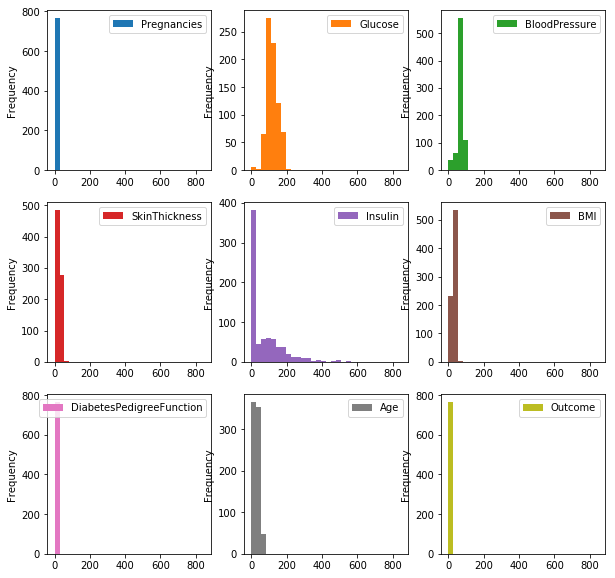

In [102]:
data.plot(kind="hist", bins=30,sharex=False,sharey=False, layout=(3,3),subplots=True,figsize=(10,10))

(array([246., 103.,  75.,  68.,  57.,  50.,  45.,  38.,  28.,  24.,  11.,
          9.,  10.,   2.,   1.,   0.,   1.]),
 array([ 0.        ,  1.05882353,  2.11764706,  3.17647059,  4.23529412,
         5.29411765,  6.35294118,  7.41176471,  8.47058824,  9.52941176,
        10.58823529, 11.64705882, 12.70588235, 13.76470588, 14.82352941,
        15.88235294, 16.94117647, 18.        ]),
 <a list of 17 Patch objects>)

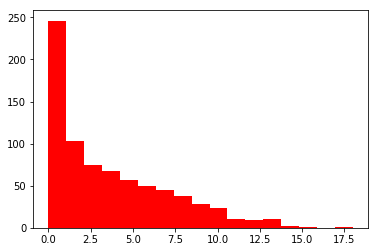

In [103]:
plt.hist(data["Pregnancies"],bins=17,rwidth=2,range=(0,18),color=["red"])

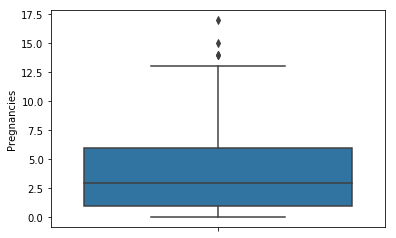

In [104]:
sns.boxplot(y=data["Pregnancies"])

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

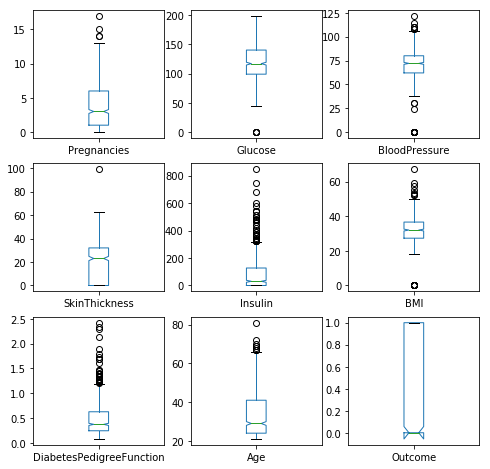

In [105]:
data.plot(kind="box",sharex=False,layout=(3,3), sharey=False, notch=True, figsize=(8,8),subplots=True)

In [106]:
train_data,test_data=train_test_split(data,test_size=0.30,random_state=2)

In [107]:
train_label=train_data["Outcome"].copy()
train_data=train_data.drop("Outcome",axis=1)


In [108]:
test_label=test_data["Outcome"].copy()

In [109]:
test_data=test_data.drop("Outcome",axis=1)

In [110]:
classifier=GaussianNB();

In [111]:
classifier.fit(train_data,train_label)

GaussianNB(priors=None, var_smoothing=1e-09)

In [113]:
predict=classifier.predict(test_data)

In [114]:
predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [115]:
accuracy=accuracy_score(test_label,predict)

In [116]:
accuracy

0.7705627705627706

In [117]:
print(confusion_matrix(test_label,predict))

[[136  19]
 [ 34  42]]
